In [59]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline

In [60]:
cd D:\Projects\Policy Evaluation\dofiles\

D:\Projects\Policy Evaluation\dofiles


In [61]:
fp =  r"..\input_data\leading_pedestrian_interval_signals_shapefile_2263\leading_pedestrian_interval_signals_shapefile_2263.shp"
df1 = gpd.read_file(fp)

In [62]:
df1.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,POINT (992974.9999266018 186489.9997614889)
1,Guyon Avenue,So Railroad Avenue,2018-01-09,2,POINT (949031.9998856507 144943.9995205229)
2,Broadway,36 Street,2018-01-09,3,POINT (1006026.000071445 216210.9997024141)


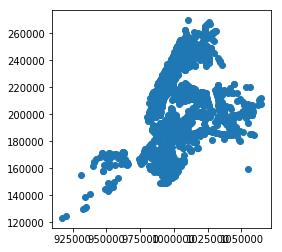

In [63]:
df1.plot()

In [64]:
df1.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [65]:
type(df1)

geopandas.geodataframe.GeoDataFrame

In [66]:
df1.crs['units']

'us-ft'

In [67]:
df1.columns

Index(['MainStreet', 'CrossStree', 'Install_Da', 'ID', 'geometry'], dtype='object')

In [68]:
df1.geometry = LPIS_data['geometry'].buffer(2000)

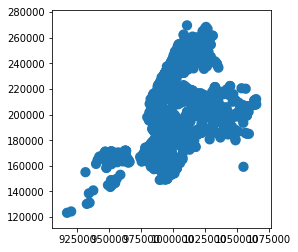

In [69]:
df1.plot()

In [70]:
df1.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,"POLYGON ((996974.9999266018 186489.9997614889,..."
1,Guyon Avenue,So Railroad Avenue,2018-01-09,2,"POLYGON ((953031.9998856507 144943.9995205229,..."
2,Broadway,36 Street,2018-01-09,3,"POLYGON ((1010026.000071445 216210.9997024141,..."


In [71]:
fp =  r"D:\Projects\Policy Evaluation\input_data\notebook_output\LPIS_buffer.shp"
df1.to_file(fp,driver ='ESRI Shapefile')

Tested the output in QGIS. It is exactly the same as the LPIS buffer I've created in QGIS.

Bringing in the intersection dataframe

In [72]:
fp =  r"D:\Projects\Policy Evaluation\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
df2 = gpd.read_file(fp)

In [74]:
df2.head()

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847)
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,8.0,1101045352991,Mundy Ln,M,S1400,110391524427,E 241st St,M,S1400,1028203.781,268236.7883,36005,Bronx,Bronx,Bronx County,POINT (1028203.781452508 268236.7883355191)
4,9.0,1101045352991,Mundy Ln,M,S1400,110391525873,Pitman Ave,M,S1400,1028580.253,266444.5479,36005,Bronx,Bronx,Bronx County,POINT (1028580.253206685 266444.547937153)


In [75]:
df2.columns

Index(['fid', 'linearid', 'fullname', 'rttyp', 'mtfcc', 'linearid_2',
       'fullname_2', 'rttyp_2', 'mtfcc_2', 'longitude', 'latitude', 'bcode',
       'bname', 'name', 'namelsad', 'geometry'],
      dtype='object')

Perform spatial join:
Intention:
Capture all intersection_id that fall within each LPIS polygon. (Something like a 1:many merge, but spatially)

In [76]:
df2.crs = df1.crs
df1_with_df2 = gpd.sjoin(df1,df2[['fid', 'geometry']], how='inner', op='intersects')


In [77]:
df1_with_df2.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry,index_right,fid
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,"POLYGON ((996974.9999266018 186489.9997614889,...",18134,50173.0
87,Underhill Avenue,St Marks Avenie,2017-11-03,88,"POLYGON ((997775.3989163449 186266.9933177325,...",18134,50173.0
89,Atlantic Avenue,FT GREENE PLACE,2017-11-08,90,"POLYGON ((994920.3993769779 188296.9931947279,...",18134,50173.0


In [78]:
filtered_data = df1_with_df2[df1_with_df2["ID"]==1]
print(filtered_data)

           MainStreet        CrossStree  Install_Da  ID  \
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
..                ...               ...         ...  ..   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   

                                             geometry  index_right      fid  
0   POLYGON ((996974.9999266018 186489.9997614889,...        18134  50173.0  
0   POLYGON ((996974.9999266018 186489.9997614889,...        18003  48900.0  
..                                                ...          ...      ...  
0   POLYGON ((996974.9999266018 186489.9997614889,...        10063  29841.0  
0   POLYGON ((996974.9999266018 186489.9997614889,...        18005  48922.0  

[287 rows x 7 columns]


saved out to check in QGIS and Stata.
Checks out. 
Now I have all intersections within each LPIS buffer.

In [79]:
df1_with_df2.columns

Index(['MainStreet', 'CrossStree', 'Install_Da', 'ID', 'geometry',
       'index_right', 'fid'],
      dtype='object')

In [82]:
save_out = df1_with_df2[['ID','fid']]

In [83]:
save_out.head(3)

,ID,fid
0,1,50173.0
87,88,50173.0
89,90,50173.0


In [84]:
type(save_out)

pandas.core.frame.DataFrame

In [85]:
fp =  r"D:\Projects\Policy Evaluation\working_data\intersection_2000ft_LPIS.dta"
save_out.to_stata(fp)